In [5]:
import pandas as pd

In [6]:
#caminho Dani
bruto = pd.read_csv(r'C:\JupyterLab\2° Semestre\Machine Learning\ML-2022-DIMP\Neutral_Graphene_Oxide_Nanoflake_Dataset.csv')

In [ ]:
#caminho Isa
bruto = pd.read_csv()

In [ ]:
#caminho Marcos
bruto = pd.read_csv(r'C:\Users\marcos220057\OneDrive - CNPEM - Centro Nacional de Pesquisa em Energia e Materiais\2sem2022\Aprendizado de Máquina\Neutral_Graphene_Oxide_Nanoflake_Dataset.csv')

In [9]:
#caminho Paola
bruto = pd.read_csv(r'C:\JupyterLab\ML-2022-DIMP\Neutral_Graphene_Oxide_Nanoflake_Dataset.csv')

In [18]:
# Excluir as colunas que tem NaN
bruto_completo = bruto.dropna(axis = 1, how ='any')

In [19]:
#Calculado a matriz de correlação peterson para ver quais atributos são bons para energia de Fermi
bruto_completo.shape
corrmat = bruto_completo.corr()

In [71]:
#printando os atributos que correlacionam melhor que 0.782
Atr1 = []
Ef = bruto_completo['Fermi_energy']
for i in corrmat['Fermi_energy'].keys():
    if abs(corrmat['Fermi_energy'][i]) > 0.782:
        Atr1.append(i)
        print(i, 'correlation:', corrmat['Fermi_energy'][i])
        print()

O_concentration correlation: -0.7963203388750189

C-C-C_C-sp2-C:error correlation: -0.8493752886340112

C-O_sp3-sp1:mean_value correlation: 0.847305780443348

C-O_sp3-strained:mean_value correlation: 0.8280893147336332

C-O-H:mean_value correlation: -0.8274333876940453

C-O-H_C-sp1-H:mean_value correlation: -0.8273869890961334

C-O_coordination_number correlation: -0.7868925300771553

density_loc_ether_mean correlation: -0.783175035923612

norm_density_ether_mean correlation: -0.7869970791019995

norm_Izz_bar_ether correlation: -0.7841549332099131

Fermi_energy correlation: 1.0



In [72]:
Et = bruto_completo['total_energy']
Atr2 = []
for i in corrmat['total_energy'].keys():
    if abs(corrmat['total_energy'][i]) > 0.93:
        print(i, corrmat['total_energy'][i])
        Atr2.append(i)
        print()

C -0.9451088774529183

H -0.9415750852322793

atom_number_total -0.997881550895204

area -0.946461806575993

all_agent_group_count -0.9546818573050628

C-C:total_number -0.9442555104184308

C-C_sp2-sp3:total_number -0.9376195769770793

C-C-C:total_number -0.9432530823044715

rings_total_number_10_all -0.9333293400696462

rings_total_number_6_all -0.9377238761263992

rings_total_number_6_sp -0.9375247370495672

Ixx_ether -0.9343988890313029

Izz_ether -0.9393554727019133

norm_Ixx_ether -0.9310057193670633

norm_Izz_ether -0.9354374049002103

total_energy 1.0



In [52]:
import lmfit 

In [68]:
def plotar(x, y, ux = 0, uy = 0, reta = False, legendas = ['x', 'y'], c='b', save = False, line = False):
    '''
    Essa função plota um gráfico de pontos ou de linha com ou sem barras de incerteza e com ou sem regressão linear.
    Argumentos obrigatórios:
    - x: Lista valores de x
    - y: Lista valores de y
    
    Argumentos opcionais:
    - ux: Lista com os valores de incertezas de x (dafault: ux = 0)
    - uy: Lista com os valores de incertezas de y (dafault: uy = 0)
    - reta: bool que define se quer regressão linear ou não (default: reta = False)
    - legendas: lista com duas strings correspondentes àa legendaa do eixo x e y (default: legendas = ['x', 'y'])
    - c: string da cor dos pontos (default: c = 'b')
    - save: string com o nome de um arquivo png, ou o bool False para não salvar (default: save = False)
    
    '''
    config = {'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (4.5, 3.5),
    'font.family': ['serif'],
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',}

    plt.style.use(['seaborn-whitegrid', 'seaborn-paper', 'seaborn-muted', config])
    fig,ax1 = plt.subplots(1,1)
    ax1.tick_params(direction='in', which='both',top=True,right=True,labelsize=12)
    
    #Labels
    ax1.set_ylabel(legendas[1], fontsize=12)
    ax1.set_xlabel(legendas[0], fontsize=12)
    #regressão linear
    if reta == True:
        def reta(x, a, b):
            return a*x + b

        reta_model=lmfit.Model(reta)

        #se der errado tentar mexer nesses valores do chute inicial:
        
        reta_model.set_param_hint('a',value=1,min= -1000000,max=3000000,vary=True) 
        reta_model.set_param_hint('b',value=1,min=-200000,max=2000000,vary=True) 
        param = reta_model.make_params()

        results = reta_model.fit(y, x = x, params = param)
        #print(results.fit_report())
        ax1.plot(x, y, 'o', markersize=0.3)
        ax1.plot(x,results.best_fit,label="Regressão Linear", c = 'r', linewidth=2) ; ax1.legend(fontsize='small')
    if line == True:
        ax1.plot(x, y)
    elif ux == 0 and uy == 0:
        ax1.plot(x, y, 'bo')

    else:
        ax1.errorbar(x, y, yerr=uy, xerr=ux, fmt='o',elinewidth=1,capsize=3,capthick=1,ms=3,c=c,ecolor='black')
    #save
    if save != False:
        plt.tight_layout()
        plt.savefig(save, dpi=200)
        plt.show()

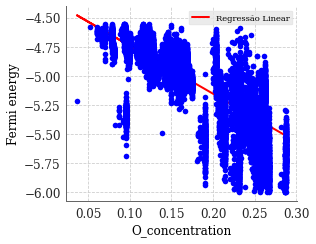

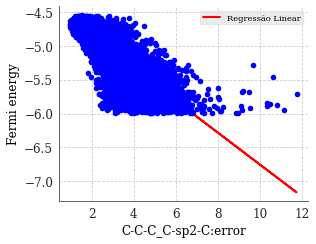

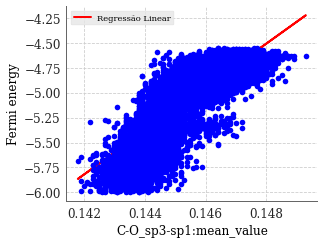

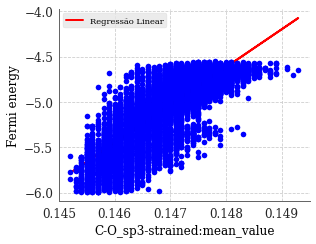

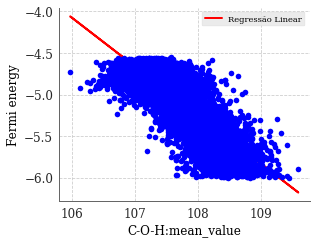

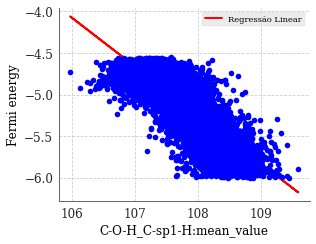

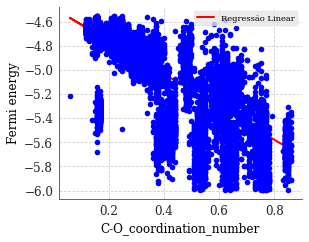

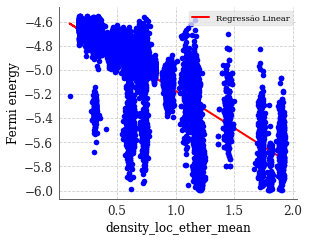

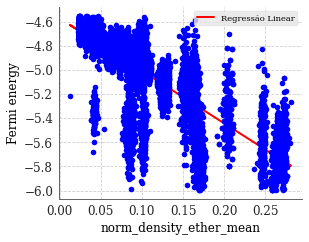

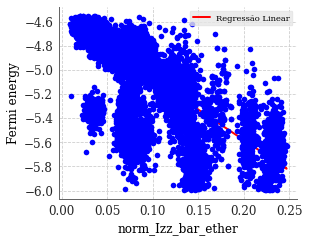

In [73]:
#Atr1.remove(Atr1[-1])
for i in Atr1:
    plotar(bruto_completo[i], Ef, legendas = [i, 'Fermi energy'],reta = True)

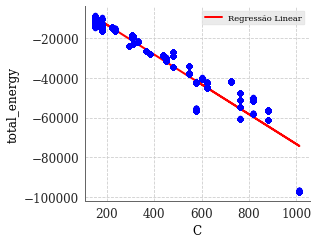

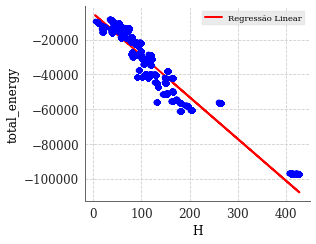

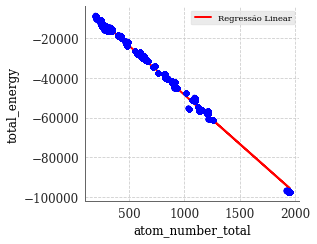

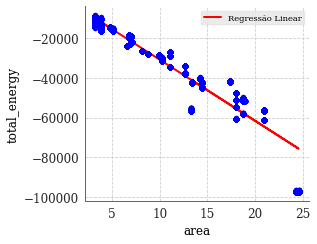

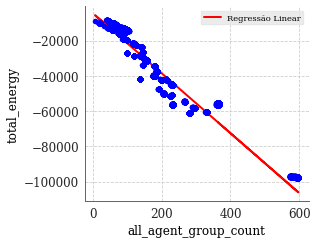

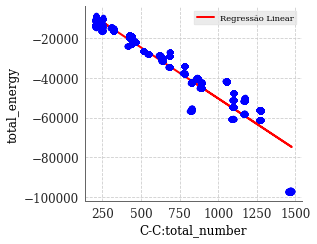

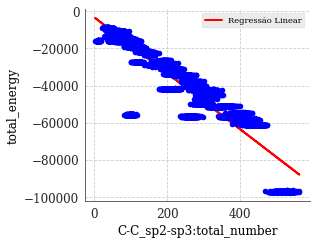

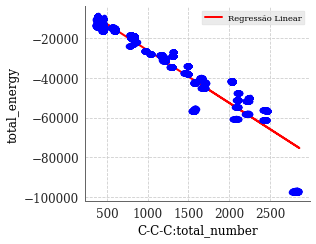

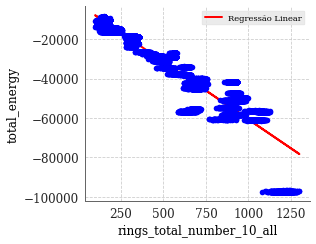

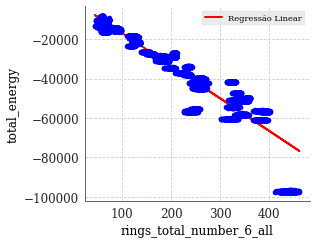

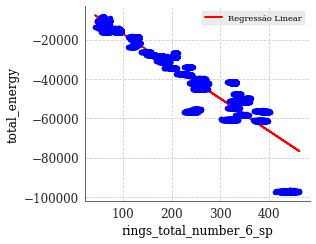

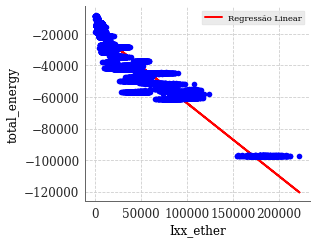

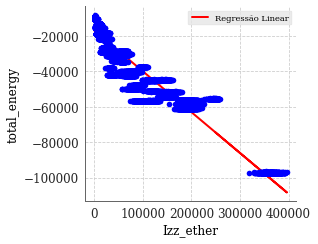

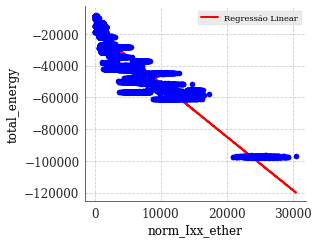

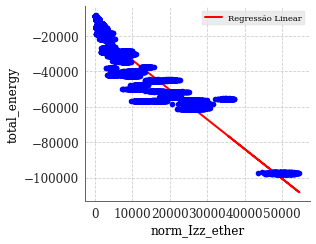

In [74]:
#Atr2.remove(Atr2[-1])
for i in Atr2:
    plotar(bruto_completo[i], Et, legendas = [i, 'total_energy'], reta = True)